In [42]:
from dataWrangler import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [43]:
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [77]:
df=Spell(frame)
df_all=Replace(df)
df_1=Process(df_all,'honda odyssey')
df_2=Process(df_all,'toyota sienna')
#toyota rav4,honda crv
#toyota highlander,honda pilot


In [78]:
df_1=Outliers_light(df_1)
df_1=delete_outliers(df_1)
df_2=Outliers_light(df_2)
df_2=delete_outliers(df_2)

In [79]:
2**df_1['price:'].mean(),2**df_2['price:'].mean()

(5982.701038443753, 6520.613928443023)

In [80]:
df_1['year:'].mean(),df_2['year:'].mean()

(14.622406639004149, 14.926229508196721)

In [81]:
df_1['odometer:'].mean(),df_2['odometer:'].mean()

(142736.8817427386, 146043.2930327869)

In [ ]:
df=Outliers_light(df)
df=delete_outliers(df)

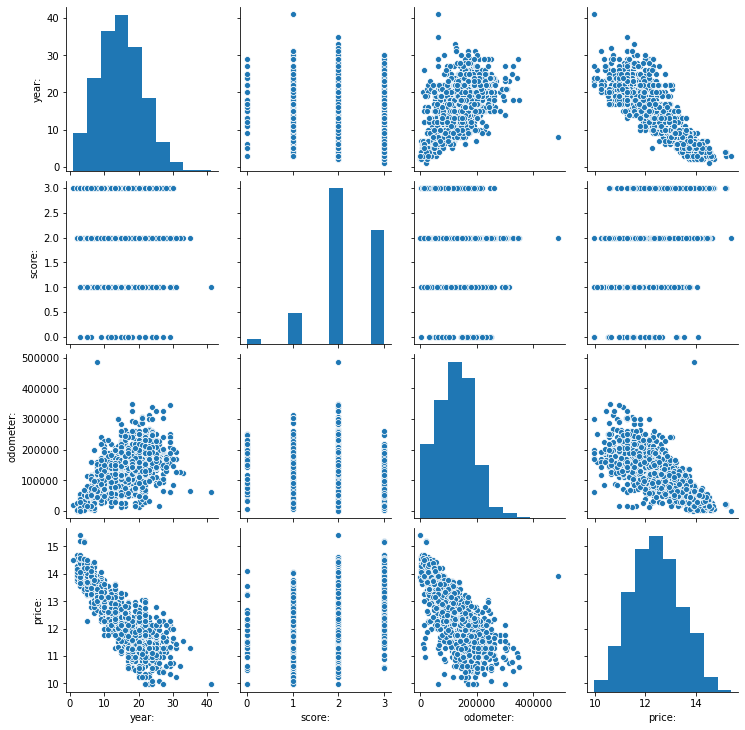

In [26]:
_=sns.pairplot(data=df)

Text(0, 0.5, 'Log Price')

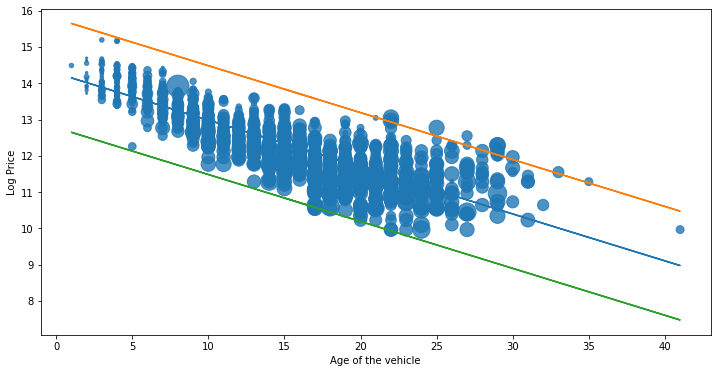

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(df['year:'],df['price:'], s=df['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df['year:'], df['price:'], 1)
plt.plot(df['year:'], m*df['year:']+ b)
plt.plot(df['year:'], m*df['year:']+ b+1.5)
plt.plot(df['year:'], m*df['year:']+ b-1.5)
plt.xlabel('Age of the vehicle')
plt.ylabel('Log Price')

### Below is the delete_outliers() function implementation 

In [28]:
try:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
except:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
df_new=df
for x,y in zip(df['year:'], m*df['year:']+ b-0.5):
    left=x
    bottom=y
    multi_outliers = df_new[(df_new['price:'] <bottom) & (df_new['year:'] < left)]
    df_new=df_new[(~df_new.isin(multi_outliers) )]
for x,y in zip(df['year:'], m*df['year:']+ b+0.5):
    right=x
    top=y
    multi_outliers2 = df[(df['price:'] >top) & (df['year:'] > right) ]
    df_new=df_new[(~df_new.isin(multi_outliers2) )]


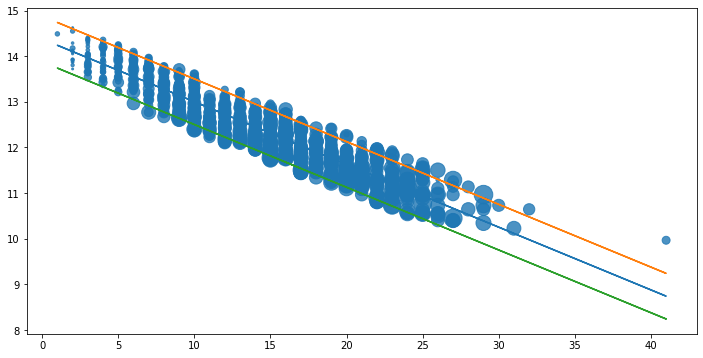

In [29]:
df_new=df_new.dropna()
plt.figure(figsize=(12,6))
plt.scatter(df_new['year:'],df_new['price:'], s=df_new['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df_new['year:'], df_new['price:'], 1)
plt.plot(df_new['year:'], m*df_new['year:']+ b)
plt.plot(df_new['year:'], m*df_new['year:']+ b+0.5)
plt.plot(df_new['year:'], m*df_new['year:']+ b-0.5)


In [13]:
#import pandas_profiling
#profile=df.profile_report()

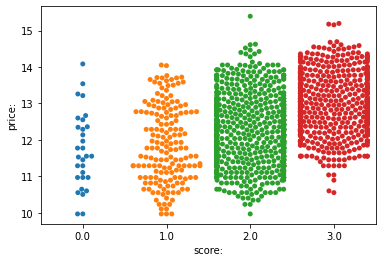

In [30]:
_=sns.swarmplot(x='score:',y='price:',data=df)


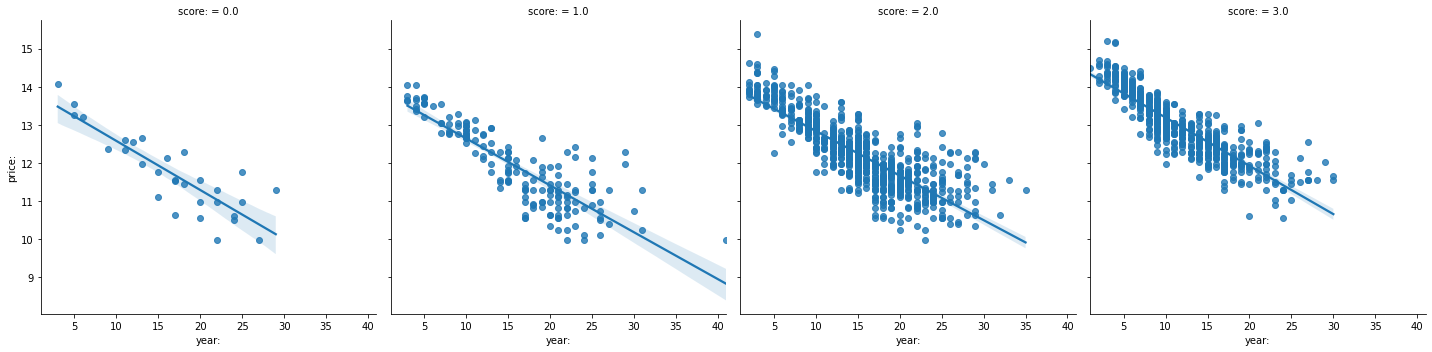

In [31]:
_=sns.lmplot(col='score:',x='year:', y='price:', data=df)

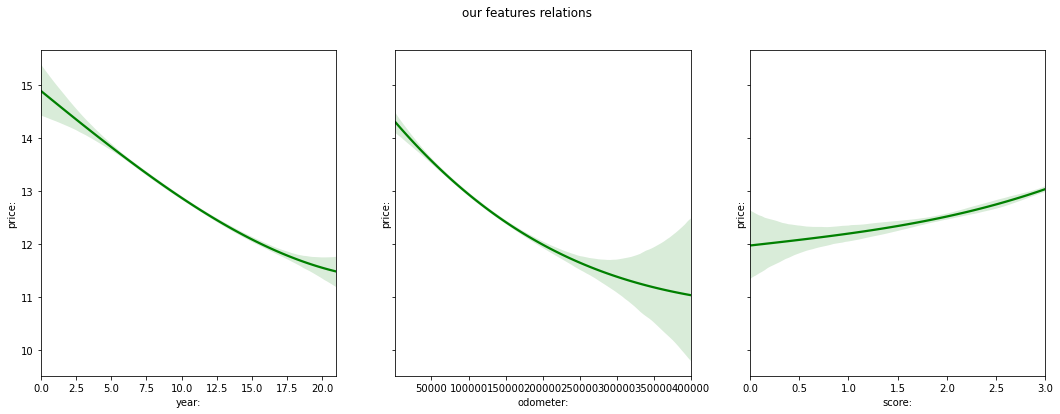

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[1],x='odometer:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[2],x='score:', y='price:', data=df, scatter=None, order=3, color='green')


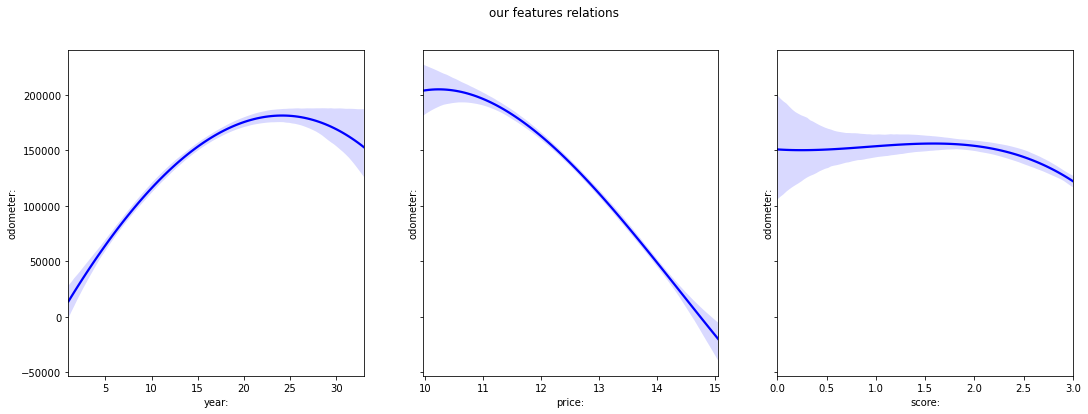

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[1],x='price:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[2],x='score:', y='odometer:', data=df, scatter=None, order=3, color='blue')


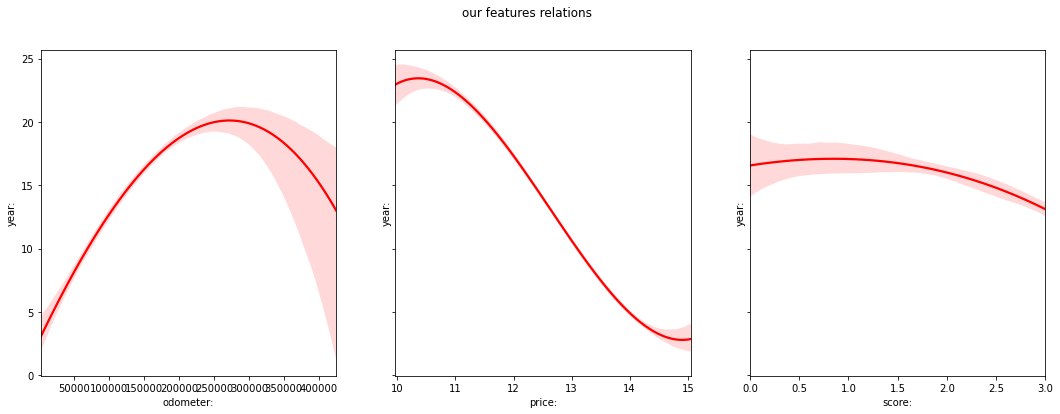

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='odometer:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[1],x='price:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[2],x='score:', y='year:', data=df, scatter=None, order=3, color='red')
